## Scikit Learn

**Todos los modelos de machine learning son implementados como clases de Python. Estas tienen dos propósitos:**
- **Implementar los algoritmos para entrenar y predecir.**
- **Almacenar la información aprendida por la data.**

**SIEMPRE antes de entrenar un modelo tengo que iniciar una instancia de ese mismo. Esto se aplica PARA TODOS los modelos en Scikit learn**

**Entrenar el modelo: método .fit()**

**Predecir el modelo: método .predict()**

**Importante:** para que los modelos funcionen tiene que usarse data pasada como numpy array o como pandas dataframe, tampoco pueden haber missing values en la data, y los valores pueden ser o continuos o categóricos.

### **Clasificación: k-Nearest Neighbors**

La idea de este modelo es tomar las k observaciones etiquetadas mas cercanas y en base a eso votar cuál sería la etiqueta de la muestra a predecir

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors= *numero*) #se inicia la instancia del kNN con la cantidad de vecinos que queremos 
    #considerar
knn.fit(*features*, *target*) #features=x, target=y


In [ ]:
x_new= np.array([]) #Array de nuevos valores
predictions= knn.predict(x_new)
print(predictions)

### Train/test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=*% del dataset que va al test set*, 
                                                  random_state=*numero de semilla*, stratify= y)
        #con stratify=y lo que se hace es mantener la distribución de etiquetas en una misma proporcion, entre el test set
        #y el training set
knn= KNeighborsClassifier(n_neighbors= *numero*) 
knn.fit(X_train, y_train)
y_pred= knn.predict(X_test)

**Accuracy**

In [ ]:
knn.score(X_test, y_test)

### Regresión

In [ ]:
x= df.drop('variable y', axis=1).values
y=df['variable y'].values

In [ ]:
x_values=x[:,5]

In [ ]:
y=y.reshape(-1,1)
x_values= x_values.reshape(-1,1)

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg= LinearRegression()
reg.fit(x_values, y)
prediction_space= np.linspace(min(x_values), max(x_values)).reshape(-1,1)

In [ ]:
plt.scatter(x_values, y, color=*color*)
plt.plot(prediction_space, reg.predict(prediction_space), color=*color*, linewidth=3)
plt.show()

**Modelo general de regresion**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=*% del dataset que va al test set*, 
                                                  random_state=*numero de semilla*)
reg= LinearRegression()
reg.fit(X_train, y_train)
y_pred= reg.predict(X_test)
reg.score(x_test, y_test)

**Cross-Validation**

Hasta el momento, la división entre train y test que veniamos haciendo no estaba cuestionada. ¿Qué problemas tiene esto? Que el R^2 qdel test set (o el indicador de exactitud) *depende de la porción de data que tomemos, que podría o no ser representativa*. Para combatir esta división arbitraria usamos cross-validation.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
cv_results= cross_val_score(reg, X, y, cv=*cantidad de folds*)
print(cv_results)

Esto me va a dar como resultado un array con los scores de cada uno de los folds (en el caso de las regresiones lineales vamos a tener el R2 por default

In [ ]:
np.mean(cv_results)

Con esto calculo la media de los valores que tengo

### Regularización

Cuando tenemos una regresión con muchas variables independientes, y muchos coeficientes en consecuencia, lo que puede pasar es que esto nos lleve a hacer overfit. Para solucionarlo podría hacerse subset selection, pero quizas no es lo mas indicado sacar variables por completo. Para esto podemos implementar métodos de **regularización**, que lo que hacen es penalizar los coeficientes para achicar su valor, y así reducir la *loss function*.
Hay dos tipos de regularización, Ridge y Lasso. Elastic Net es un punto medio (la curvatura de la restricción se encuentra entre ambas).

**Ridge**

In [ ]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=*% del dataset que va al test set*, 
                                                  random_state=*numero de semilla*)
ridge= Ridge(alpha=0.1, normalize= True)
ridge.fit(X_train, y_train)
ridge_pred= ridge.predict(X_test)
ridge.score(X_test, y_test)

**Lasso**

In [ ]:
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=*% del dataset que va al test set*, 
                                                  random_state=*numero de semilla*)
lasso= Lasso(alpha=0.1, normalize= True)
lasso.fit(X_train, y_train)
lasso_pred= lasso.predict(X_test)
lasso.score(X_test, y_test)

La particularidad de Lasso es que permite hacer feature selection, porque permite que hayan coeficientes que tengan valor 0. **Acá abajo se ve como**

In [ ]:
from sklearn.linear_model import Lasso
x= df.drop('y', axis=1).columns
lasso= Lasso(alpha=0.1)
lasso_coef= lasso.fit(X,y).coef_
_= plt.plot(range(len(x)), lasso_coef)
_= plt.xticks(range(len(x)), x, rotation=90)
_= plt.ylabel('Coefficients')
plt.show()

### ¿Qué tan bueno es un modelo?

Generalmente se usa la accuracy como medida de la bondad de un modelo. Sin embargo, esta no siempre es indicada. Supongamos el caso de detección de Spam en el mail. Del 100% de los correos, el 1% es spam. 
Para esto podría hacer un clasificador que interprete que **todos** los mails son reales (no spam). **Esto nos va a dar como resultado un modelo con una Accuracy del 99%, pero predijo mal el 100% de los spam. En este caso, falla el propósito principal del modelo**.
Para esto es importante conocer la noción de matriz de confusión
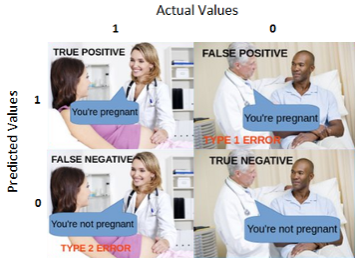

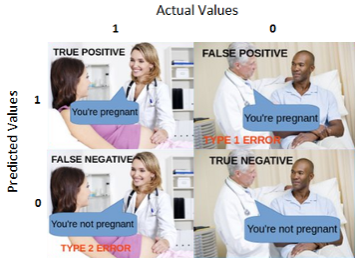

**Matriz de confusión en scikit-learn**

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
knn= KNeighborsClassifier(n_neighbors= *numero de vecinos*)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=*% del dataset que va al test set*, 
                                                  random_state=*numero de semilla*)
knn.fit(X_train, y_train)
y_pred= knn.predict(X_test)

*Para todas las métricas en scikit-learn el primer argumento es siempre la etiqueta verdadera y el segundo es siempre la predicción*

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
print(classification_report(y_test, y_pred))

### Regresión Logística

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
logreg= LogisticRegression()
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=*% del dataset que va al test set*, 
                                                  random_state=*numero de semilla*)
knn.fit(X_train, y_train)
y_pred= knn.predict(X_test)

### Curva ROC

¿Qué pasa con los true positive y false positive rate a medida que variamos el límite de la regresión logística?  Cuando el **threshold=0**, el modelo predice 1 para toda la data, lo que quiere decir que **TPR=FPR=1**. Cuando **threshold=1**, el modelo predice 0 para toda la data, o sea que **TPR=FPR=0**. 
Si variamos el threshold entre estos dos extremos, tendremos una serie de FPR y TPR. *El set de puntos que obtenemos cuando probamos todos los posibles límites tiene el nombre de Receiver Operating Characteristic Curve o __ROC Curve__*.

In [ ]:
from sklearn.metrics import roc_curve
y_pred_prob= logreg.predict_proba(X_test)[:,1]
fpr, tpf, thresholds= roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show();

Como vemos arriba, usamos **predict_proba()** para determinar y_pred_prob. Usamos las probabilidades predichas del modelo asignando un valor de 1 a la observación en cuestion. Esto es porque para computar el ROC no queremos solamente las predicciones del test set, sino que queremos la probabilidad de que nuestro modelo de regresión logística (el output) antes de usar un threshold para predecir la etiqueta.
Para esto, usamos el método **predict_proba()** y le pasamos la test data. Predict_proba devuelve un array con dos columnas. Cada columna contiene las probabilidades para los respectivos target values. Elegimos la segunda columna (indice 1): la probabilidad de las predichas siendo 1 label.

In [ ]:
logreg.predict_proba(X_test)[:,1]

## Calculo de Area Under the Curve o AUC

In [ ]:
from sklearn.metrics import roc_auc_score
logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.4, 
                                                    random_state=42)
logreg.fit(X_train, y_train)
y_pred_prob = logreg.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred_prob)

**AUC usando cross validation**

In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(logreg, X, y, 
                            cv=5, scoring='roc_auc')
print(cv_scores)

## Hyperparameter tuning

En los modelos de Machine Learning, hay parámetros que hay que específicar antes de fitear un modelo. Estos se llaman **hiperparámetros**. Ejemplos de estos pueden ser el alpha de Ridge/Lasso o el k de kNN. Estos no pueden ser aprendidos por el entrenamiento del modelo, por esto hay que setearlos. El proceso para elegir el valor correcto para este sería:
- Elegir un conjunto distinto de valores de hiperparámetros,
- Fitearlos de forma separada, 
- Ver qué tan bien performa cada uno de estos, 
- Elegir el que mejor performa

**Para este proceso es esencial el uso de Cross-Validation!!!**

### Grid Search Cross-Validation

Una forma de testear los parámetros es mediante Grid Search. Lo que hace este método es armar una grilla con los valores posibles, y luego se hace k-Fold CV para cada celda de esta grilla y elegimos el hiperparámetro que mejor performa

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid= {'n_neighbors': np.arange(1, 50)} #1
knn= KNeighborsClassifier() #2
knn_cv= GridSearchCV(knn, param_grid, cv=5) #3
knn_cv.fit(X,y) #4
knn_cv.best_params_

In [ ]:
knn_cv.best_score_

1- Lo que se hace primero es especificar un diccionario donde las keys sean el nombre del hiperparámetro (en este caso n_neighbors). El value en el grid dict es una lista que contenga los valores que queremos tunear sobre los hiperparámetros (si especificamos varios hiperparámetros, se van a tener que testear todas las combinaciones posibles).

2- Luego, inicializamos el modelo

3- En GridSearchCV pasamos nuestro modelo, el grid que queremos tunear y la cantidad de folds para CV

4- Fiteamos la data y esta es la que performa el grid

Después bajamos el mejor parámetro y el best score (devuelve la media del CV)

### Randomized Search CV

GridSearchCV puede ser computacionalmente muy costoso si tenemos muchos hiperparámetros por buscar.
Una solución es el **RandomizedSearchCV**, donde no todos los valores de los hiperparámetros se prueban. En su lugar se samplea una cantidad fija de hiperparámetros de una distribución de probabilidaddes específica.
Por ejemplo, acá vemos un caso con arboles de decisión.

In [ ]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))